###### 2023-11-22 ITHS

```
===============================

Lektion 1: Robert Nyquist
Maskininlärning genom historien

===============================
```

### Brief history of ML

| Year | Event                   | Wikipedia Link                                      |
|------|-------------------------|-----------------------------------------------------|
| 1940 | McCullen & Pitt         | [McCulloch–Pitts neuron](https://en.wikipedia.org/wiki/McCulloch–Pitts_neuron) |
| 1959 | Arthur Samuel           | [Arthur Samuel](https://en.wikipedia.org/wiki/Arthur_Samuel_(computer_scientist)) |
| 2000 | ImageNet                | [ImageNet](https://en.wikipedia.org/wiki/ImageNet) |
| 2011 | IBM Watson              | [IBM Watson](https://en.wikipedia.org/wiki/IBM_Watson) |
| 2016 | AlphaGo                 | [AlphaGo](https://en.wikipedia.org/wiki/AlphaGo) |
| 2020 | Tesla beta model        | [Tesla Autopilot](https://en.wikipedia.org/wiki/Tesla_Autopilot) |
| 2022 | OpenAI                  | [OpenAI](https://en.wikipedia.org/wiki/OpenAI) |
| 2023 | Generative AI Explosion | [Generative pre-trained transformer](https://en.wikipedia.org/wiki/Generative_pre-trained_transformer) |

**1940 McCullen & Pitt: Artificial Neuron**

For a given artificial neuron k, let there be m&nbsp;+&nbsp;1 inputs with signals x<sub>0</sub> through x<sub>m</sub> and weights w<sub>k</sub><sub>0</sub> through w<sub>k</sub><sub>m</sub>. Usually, the x<sub>0</sub> input is assigned the value +1, which makes it a bias input with w<sub>k0</sub>&nbsp;=&nbsp;b<sub>k</sub>. This leaves only m actual inputs to the neuron: from x<sub>1</sub> to x<sub>m</sub>.


The output of the kth neuron is:

$y_k =  \varphi \left( \sum_{j=0}^m w_{kj} x_j \right)$

Where $\varphi$ (phi) is the  transfer function (commonly  a threshold function).

![](https://upload.wikimedia.org/wikipedia/commons/b/b0/Artificial_neuron.png)

**1959 Arthur Samuel**

Believed teaching computers to play games was very *fruitful*.

[Rote learning](https://en.wikipedia.org/wiki/Rote_learning)

DNN, Deep Neural Network

Scalable hidden layers, no size cap

In the structured ML setting, humans play a crucial role in assigning labels and weights. A human expert determines the distinctive characteristics of each feature, leading to a supervised learning approach. Deep Learning (DL) does not necessarily require labeled data.

---

#### :pizza: Simplified example (human pizza ordering expert) ([video](https://www.youtube.com/watch?app=desktop&v=q6kJ71tEYqM))

X<sub>1</sub> = time saved by ordering out (bool: 1 for yes, 0 for no)

X<sub>2</sub> = likelihood of losing weight (bool: 1 for yes, 0 for no)

X<sub>3</sub> = potential cost savings (bool: 1 for yes, 0 for no)

Weights are assigned to each input to determine their importance:

w<sub>1</sub> = 5 (value of time)
w<sub>2</sub> = 3 (interest in fitness)
w<sub>3</sub> = 2 (financial impact)

An activation function is used to calculate the output, and a threshold (THRESH) is set at 5.

$\hat{y}$ =(1×5)+(0×3)+(1×2)−5=2

Output is positive -> the decision is to order pizza.

---


When there are more than three layers involved in the process, it's Deep Learning. Most deep learning models are feed-forward, while opposite direction is back-propagation.

```
Computer Vision, Object Detection, Anomaly Detection
NLP, LLM
Voice recogintion, audio/signal processing + generation
Audio & VST + Acoustics
Reinforcement learning + Agents for games
Healthcare
```

### Perceptrons, weights, bias, hidden layers,

Input -> Weights -> ∑ -> Non-Linearity -> Output

**Perceptron/Neuron**

$ f(\sum w_i x_i + b) = \hat{y} $

Weighted sum of inputs $ \sum w_i x_i\ $, where $ w_i\ $ are the weights, $ x_i $ are the inputs, and $ b $ is the bias. The result is then passed through an activation function $ f $ to produce the output $ \hat{y} $.

Fully connected = all neurons/perceptrons connected from input to hidden to output

**Neuron Operation**

Every perceptron takes multiple input and produce one output (weighted sum) which applies a non-linearity (through activation function)

**Neural Network Layers**

- *Input Layer:* Has known size, receives input data. For example, each input neuron might represent a coordinate.

- *Hidden Layers:* These layers add complexity to the network. The more hidden layers there are, the more intricate the learned representations become.

**Activation Functions**

Introduce non-linearities to the model, allowing it to learn complex patterns. ReLU (Rectified Linear Unit) is kind of linear (linear for positive values but becomes zero for negative values).



### Cluster separation example

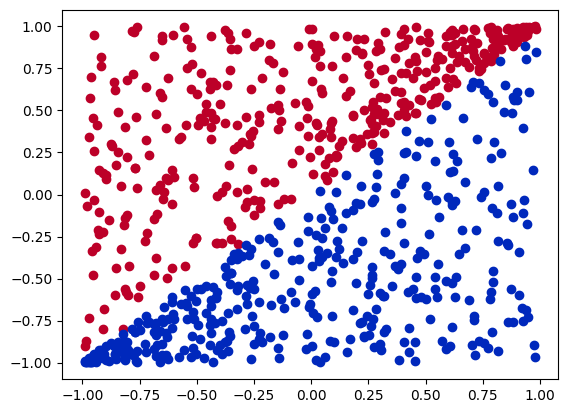

In [21]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n = 400

x_vals = np.random.uniform(-1, 1, n)
red_y = x_vals + np.random.uniform(0, 1 - x_vals, n)

# Blue cluster
blue_y = x_vals - np.random.uniform(0, x_vals + 1, n)

plt.scatter(x_vals, red_y, color='#bc0028')
plt.scatter(x_vals, blue_y, color='#0028bc')

plt.show()


Can be separated linearly with a binary classifier, such as a linear support vector machine (SVM)

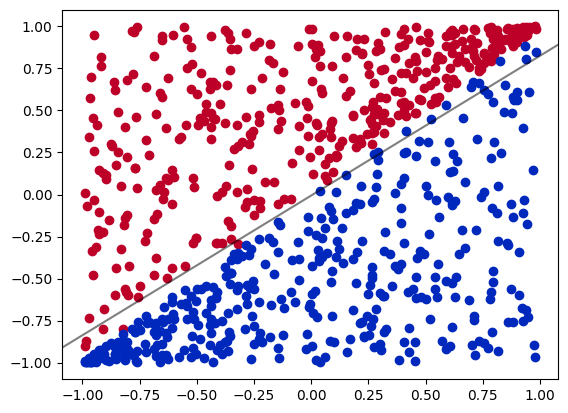

In [27]:
from sklearn.svm import SVC

red_cluster = np.vstack([x_vals, red_y]).T
blue_cluster = np.vstack([x_vals, blue_y]).T

labels = np.concatenate([np.zeros(n), np.ones(n)]) # Label 0 for Red cluster, 1 for Blue cluster
features = np.vstack([red_cluster, blue_cluster])

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(features, labels)

plt.scatter(red_cluster[:, 0], red_cluster[:, 1], color='#bc0028')
plt.scatter(blue_cluster[:, 0], blue_cluster[:, 1], color='#0028bc')



ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

plt.show()


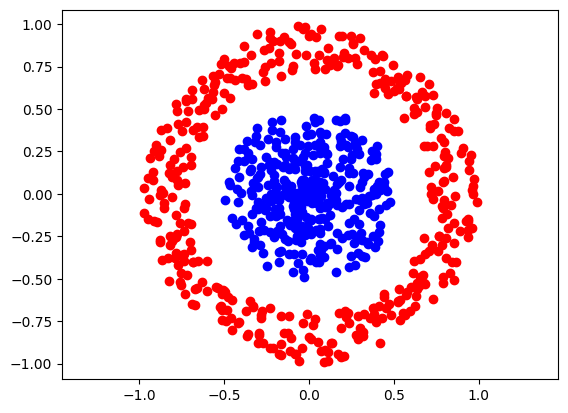

In [28]:
theta_inner = np.linspace(0, 2*np.pi, n)
radius_inner = np.random.uniform(0, 0.5, n)
x_inner = radius_inner * np.cos(theta_inner)
y_inner = radius_inner * np.sin(theta_inner)

theta_outer = np.linspace(0, 2*np.pi, n)
radius_outer = np.random.uniform(0.7, 1.0, n)
y_outer = radius_outer * np.sin(theta_outer)

plt.scatter(x_inner, y_inner, color='blue', label='Inner')
plt.scatter(x_outer, y_outer, color='red', label='Outer')

plt.axis('equal')

plt.show()

Not linearly separable

### Inference (forward pass) (sv: inferens/"beräkning av datapunkt")

#TODO

x: input vector

y: target vector

y^: ouput vector

L: n layers

f^l activation function layer l

W^l = (w^l_jk) weight between k:th node in layer l - 1 and j:th node in layer l 

g(x) = 

For one data point $(x_{i},y_{i})$, output calculated $ g(x_{i}) =  \hat{y}_{i} $


**How does the network learn?**

- Approximate a function
- We don't know the function, but we know input, output and ground truth
- Minimize error

**Loss function**

Mean squared Error


$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $


Cross entropy loss

(more on this later)

**Back-propagation**

Loss -> update network

**Min & Max**

Look for when training model:
- Local max, min
- Global max, min

**Derviate**
Slope of curve affects how big of an uppdate in NN


### Gradient

Gradient is a vector which points to the direction of sharpest slope/steepest ascent in a function

### The Chain Rule

For F(x) = f(g(x))

Derivate a nested function = The Chain Rule

F'(x) = f'(g(x)).g'(x)

In back-propagation

Back-propagation, get error of weights -> Update weights
Get gradients for every weight

All weights should be in global min with smallest loss

**Learning rate (step size)**

Small learning rate = many updates

Too high = divergence

Just right = swiftly reaches min

### Gradient descent

w<sub>new</sub> = w<sub>old</sub> - $\alpha$(dJ/dw) 

$\alpha$ = learning_rate

$\delta J$ / $\delta w $ = gradient

*"när vi går ner för backen så minimerar vi felet"*


#### Training from scratch

- Start with random weights (might be a better solution out there)
- Iterate over all data points, backprop and update weights
- Repeat until NN converges, aka finds the functions we're looking for
- Feed network with new data

## ResNet-18 example (torchinfo)

```
==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
==========================================================================================
ResNet                                   [1, 1000]                 --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│    └─BasicBlock: 2-2                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-7                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-8             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-9                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-10                 [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-11            [1, 64, 56, 56]           128
│    │    └─ReLU: 3-12                   [1, 64, 56, 56]           --
├─Sequential: 1-6                        [1, 128, 28, 28]          --
│    └─BasicBlock: 2-3                   [1, 128, 28, 28]          --
│    │    └─Conv2d: 3-13                 [1, 128, 28, 28]          73,728
│    │    └─BatchNorm2d: 3-14            [1, 128, 28, 28]          256
│    │    └─ReLU: 3-15                   [1, 128, 28, 28]          --
│    │    └─Conv2d: 3-16                 [1, 128, 28, 28]          147,456
│    │    └─BatchNorm2d: 3-17            [1, 128, 28, 28]          256
│    │    └─Sequential: 3-18             [1, 128, 28, 28]          8,448
│    │    └─ReLU: 3-19                   [1, 128, 28, 28]          --
│    └─BasicBlock: 2-4                   [1, 128, 28, 28]          --
│    │    └─Conv2d: 3-20                 [1, 128, 28, 28]          147,456
│    │    └─BatchNorm2d: 3-21            [1, 128, 28, 28]          256
│    │    └─ReLU: 3-22                   [1, 128, 28, 28]          --
│    │    └─Conv2d: 3-23                 [1, 128, 28, 28]          147,456
│    │    └─BatchNorm2d: 3-24            [1, 128, 28, 28]          256
│    │    └─ReLU: 3-25                   [1, 128, 28, 28]          --
├─Sequential: 1-7                        [1, 256, 14, 14]          --
│    └─BasicBlock: 2-5                   [1, 256, 14, 14]          --
│    │    └─Conv2d: 3-26                 [1, 256, 14, 14]          294,912
│    │    └─BatchNorm2d: 3-27            [1, 256, 14, 14]          512
│    │    └─ReLU: 3-28                   [1, 256, 14, 14]          --
│    │    └─Conv2d: 3-29                 [1, 256, 14, 14]          589,824
│    │    └─BatchNorm2d: 3-30            [1, 256, 14, 14]          512
│    │    └─Sequential: 3-31             [1, 256, 14, 14]          33,280
│    │    └─ReLU: 3-32                   [1, 256, 14, 14]          --
│    └─BasicBlock: 2-6                   [1, 256, 14, 14]          --
│    │    └─Conv2d: 3-33                 [1, 256, 14, 14]          589,824
│    │    └─BatchNorm2d: 3-34            [1, 256, 14, 14]          512
│    │    └─ReLU: 3-35                   [1, 256, 14, 14]          --
│    │    └─Conv2d: 3-36                 [1, 256, 14, 14]          589,824
│    │    └─BatchNorm2d: 3-37            [1, 256, 14, 14]          512
│    │    └─ReLU: 3-38                   [1, 256, 14, 14]          --
├─Sequential: 1-8                        [1, 512, 7, 7]            --
│    └─BasicBlock: 2-7                   [1, 512, 7, 7]            --
│    │    └─Conv2d: 3-39                 [1, 512, 7, 7]            1,179,648
│    │    └─BatchNorm2d: 3-40            [1, 512, 7, 7]            1,024
│    │    └─ReLU: 3-41                   [1, 512, 7, 7]            --
│    │    └─Conv2d: 3-42                 [1, 512, 7, 7]            2,359,296
│    │    └─BatchNorm2d: 3-43            [1, 512, 7, 7]            1,024
│    │    └─Sequential: 3-44             [1, 512, 7, 7]            132,096
│    │    └─ReLU: 3-45                   [1, 512, 7, 7]            --
│    └─BasicBlock: 2-8                   [1, 512, 7, 7]            --
│    │    └─Conv2d: 3-46                 [1, 512, 7, 7]            2,359,296
│    │    └─BatchNorm2d: 3-47            [1, 512, 7, 7]            1,024
│    │    └─ReLU: 3-48                   [1, 512, 7, 7]            --
│    │    └─Conv2d: 3-49                 [1, 512, 7, 7]            2,359,296
│    │    └─BatchNorm2d: 3-50            [1, 512, 7, 7]            1,024
│    │    └─ReLU: 3-51                   [1, 512, 7, 7]            --
├─AdaptiveAvgPool2d: 1-9                 [1, 512, 1, 1]            --
├─Linear: 1-10                           [1, 1000]                 513,000
==========================================================================================
Total params: 11,689,512
Trainable params: 11,689,512
Non-trainable params: 0
Total mult-adds (G): 1.81
==========================================================================================
Input size (MB): 0.60
Forward/backward pass size (MB): 39.75
Params size (MB): 46.76
Estimated Total Size (MB): 87.11
==========================================================================================

```